In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1234)

In [3]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

1. Подберите скорость обучения (alpha) и количество итераций для градиентного спуска. 

In [4]:
# Возьмем 2 признака и 100 объектов
n_features = 2
n_objects = 100

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ))

In [5]:
# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-5, 5, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

In [6]:
# возьмем нулевые начальные веса
w = np.zeros(n_features)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# зададим начальное значение шага градиентного спуска
alpha = 1e-6

# список значений шагов градиентного спуска
alpha_list = []

# список значений количества итераций
iter_list = []

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

In [7]:
# ход градиентного спуска
while alpha <= 10:
    while weight_dist > min_weight_dist:
        new_w = w - 2 * alpha * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        iter_num += 1
        w = new_w
    iter_list.append(iter_num)
    alpha_list.append(alpha)
    errors.append(mserror(X, new_w, Y))
    iter_num = 0
    alpha *= 5
    w = np.zeros(n_features)
    weight_dist = np.inf

alpha_list = np.array(alpha_list)
iter_list = np.array(iter_list)
alpha_list

array([1.000000e-06, 5.000000e-06, 2.500000e-05, 1.250000e-04,
       6.250000e-04, 3.125000e-03, 1.562500e-02, 7.812500e-02,
       3.906250e-01, 1.953125e+00, 9.765625e+00])

In [8]:
iter_list

array([512821, 124763,  29391,   6763,   1526,    335,     68,     27,
          379,    198,    137])

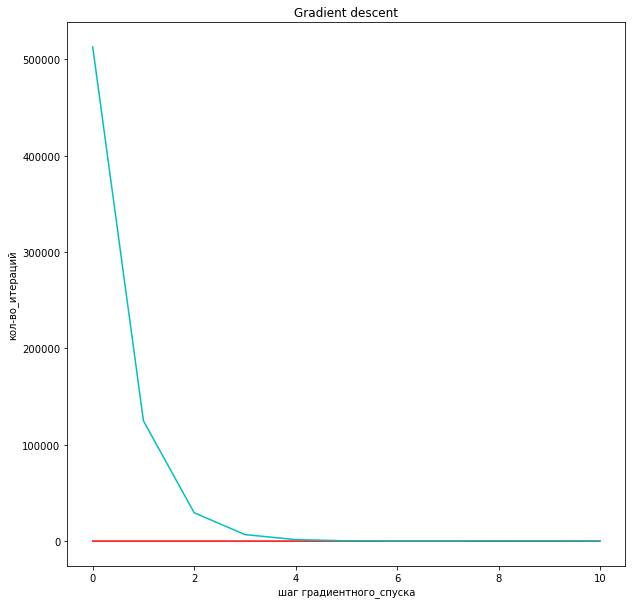

In [19]:
# Визуализируем скорость обучения в зависимости от шага градиентного спуска
#plt.figure(figsize=(13, 6))
fig, ax = plt.subplots(figsize=(10,10))

plt.title('Gradient descent')
plt.xlabel('шаг градиентного_спуска')
plt.ylabel('кол-во_итераций')

#plt.scatter(alpha_list, iter_list)
plt.plot(alpha_list, '-r')
plt.plot(iter_list, '-c')
#plt.plot(alpha_list, iter_list)

plt.show()